### 1. IMPORTING REQUIRED LIBRARIES AND THEN THE DATASET

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [6]:
df = pd.read_csv("../data/raw/dataset.csv")
df.head()

,Application_ID,Companies,Job_Title,Educational Degree,Location,Experience_Years,Number of Skills,Source of Application,Application_Received,Last_Updated,Salary,Applicant Selected
0,APP1000568,Deloitte,Financial Analyst,M.Com,Chennai,8,6,Company Website,2024-09-11 09:04:51,2024-11-25 11:08:25,1316000,1
1,APP1000438,Byju's,Sales Executive,B.Com,Pune,1,5,Employee Referral,2024-10-27 08:25:25,2024-11-02 07:28:57,650000,1
2,APP1000961,StartUpX,Frontend Developer,B.Tech,Pune,2,2,Employee Referral,2025-03-06 10:43:03,2025-03-24 23:12:14,825000,1
3,APP1001286,Flipkart,Backend Engineer,B.Tech,Hyderabad,7,6,Job Fair,2024-12-27 08:16:48,2025-01-02 17:36:34,1269000,1
4,APP1000531,HCL,Software Developer,MCA,Lucknow,3,6,Company Website,2025-02-09 09:36:52,2025-04-17 07:39:43,1186000,0


In [7]:
print(df.shape)

(1500, 12)


### 2. DATA CLEANING

In [8]:
df_copy = df.copy()   # creating copy

df_copy = df_copy.drop(columns=['Application_Received', 'Application_ID', 'Last_Updated', 'Location'])

print("Required Columns")
print(df_copy.columns.tolist())

# Data cleaning
print("\nMissing values:")
print(df_copy.isnull().sum())

# Filling na values
# df_copy['Location'].fillna(df_copy['Location'].mode()[0], inplace=True)
df_copy['Salary'].fillna(df_copy['Salary'].median(), inplace=True)
df_copy['Experience_Years'].fillna(df_copy['Experience_Years'].median(), inplace=True)

print("\nChecking for missing values after filling:")

print("\nMissing values:")
print(df_copy.isnull().sum())

if(df_copy.isnull().sum().sum() == 0):
    print("\nNo missing value left.")
else:
    print("There are some missing values")

Required Columns
['Companies', 'Job_Title', 'Educational Degree', 'Experience_Years', 'Number of Skills', 'Source of Application', 'Salary', 'Applicant Selected']

Missing values:
Companies                0
Job_Title                0
Educational Degree       0
Experience_Years         0
Number of Skills         0
Source of Application    0
Salary                   0
Applicant Selected       0
dtype: int64

Checking for missing values after filling:

Missing values:
Companies                0
Job_Title                0
Educational Degree       0
Experience_Years         0
Number of Skills         0
Source of Application    0
Salary                   0
Applicant Selected       0
dtype: int64

No missing value left.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16740\4273242159.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Salary'].fillna(df_copy['Salary'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16740\4273242159.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [9]:
df_copy.describe()

,Experience_Years,Number of Skills,Salary,Applicant Selected
count,1500.000000,1500.00000,1.500000e+03,1500.00000
mean,4.894667,3.97400,1.254207e+06,0.52400
std,2.317575,1.41892,2.452721e+05,0.49959
min,0.000000,2.00000,5.160000e+05,0.00000
25%,3.000000,3.00000,1.094750e+06,0.00000
50%,5.000000,4.00000,1.219000e+06,1.00000
75%,6.000000,5.00000,1.393000e+06,1.00000
max,10.000000,6.00000,2.125000e+06,1.00000


### 3. CHECKING AND DEALING WITH OUTLIERS

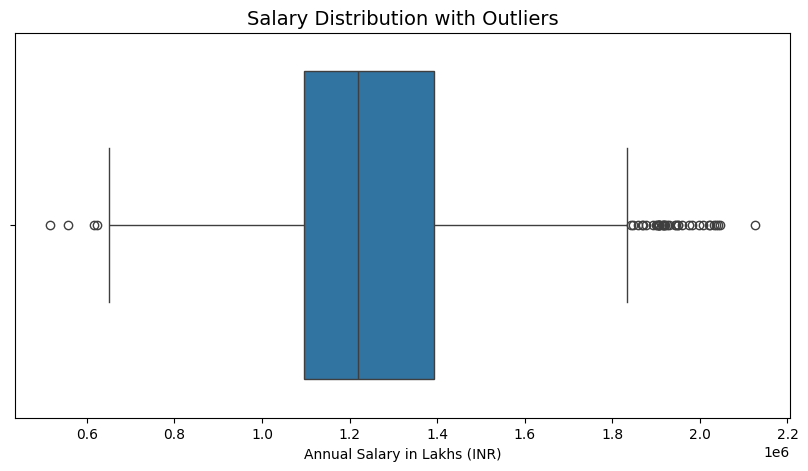

In [10]:
# Visualize

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copy['Salary'])
plt.title('Salary Distribution with Outliers', fontsize=14)
plt.xlabel('Annual Salary in Lakhs (INR)', fontsize=10)
plt.show()

In [11]:
print(f"Number of rows before removing outliers: {df_copy.shape[0]}")

Number of rows before removing outliers: 1500


In [12]:
# q1 = df_copy["Salary"].quantile(0.25)
# q3 = df_copy["Salary"].quantile(0.75)

# iqr = q3 - q1

# min_range = q1 - (1.5*iqr)
# max_range = q3 + (1.5*iqr)
# min_range, max_range

In [13]:
# df_copy = df_copy[(df_copy['Salary'] >= min_range) & (df_copy['Salary'] <= max_range)]

# print(f"Number of rows after removing outliers: {df_copy.shape[0]}")

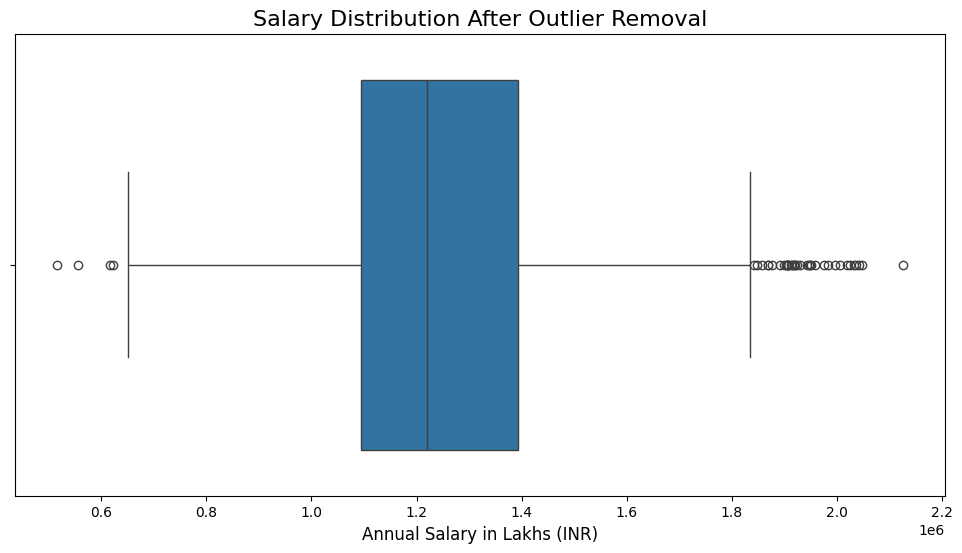

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_copy['Salary'])
plt.title('Salary Distribution After Outlier Removal', fontsize=16)
plt.xlabel('Annual Salary in Lakhs (INR)', fontsize=12)
plt.show()

### 4. Exploratory Data Analysis (EDA) on Cleaned Data

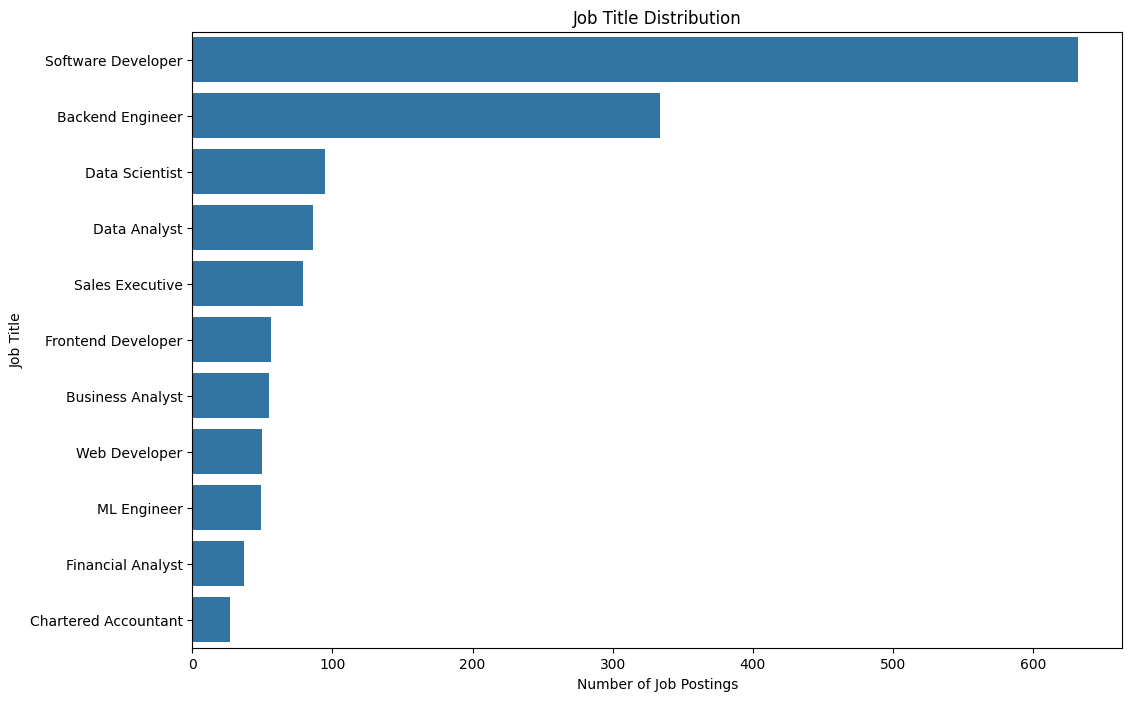

In [15]:
# Comparing number of job posting based on job title

plt.figure(figsize=(12, 8))
sns.countplot(y="Job_Title", data=df_copy, order=df_copy['Job_Title'].value_counts().index)
plt.title("Job Title Distribution")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.show()

Text(0.5, 1.0, 'Distribution of Experience(Years)')

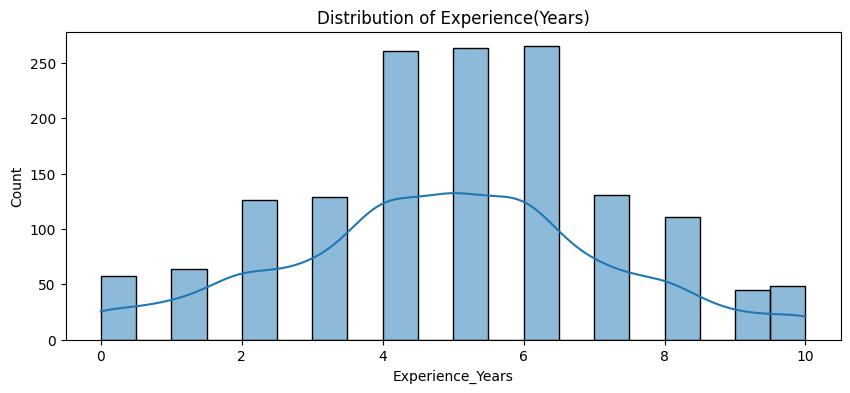

In [16]:
# Distribution of experience

plt.figure(figsize=(10, 4))
sns.histplot(df_copy['Experience_Years'], kde=True)
plt.title('Distribution of Experience(Years)')

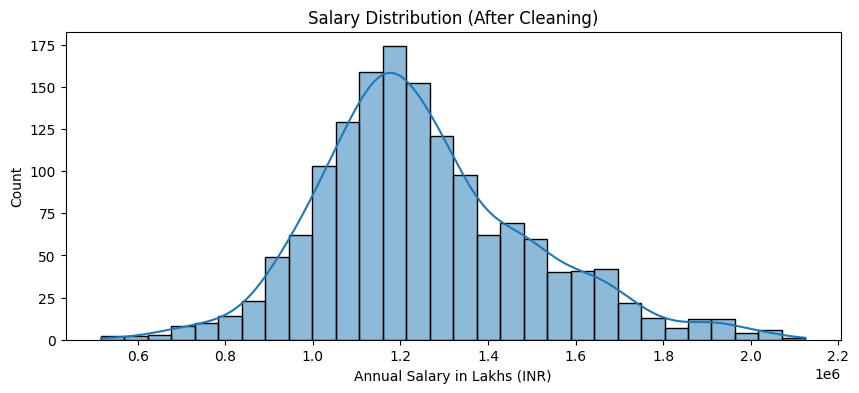

In [17]:
# Checking for Salary distribution after removing outliers

plt.figure(figsize=(10, 4))
sns.histplot(df_copy["Salary"], bins=30, kde=True)
plt.title("Salary Distribution (After Cleaning)")
plt.xlabel("Annual Salary in Lakhs (INR)")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16740\3652507047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Applicant Selected', y='Source of Application', data=df, palette="viridis")


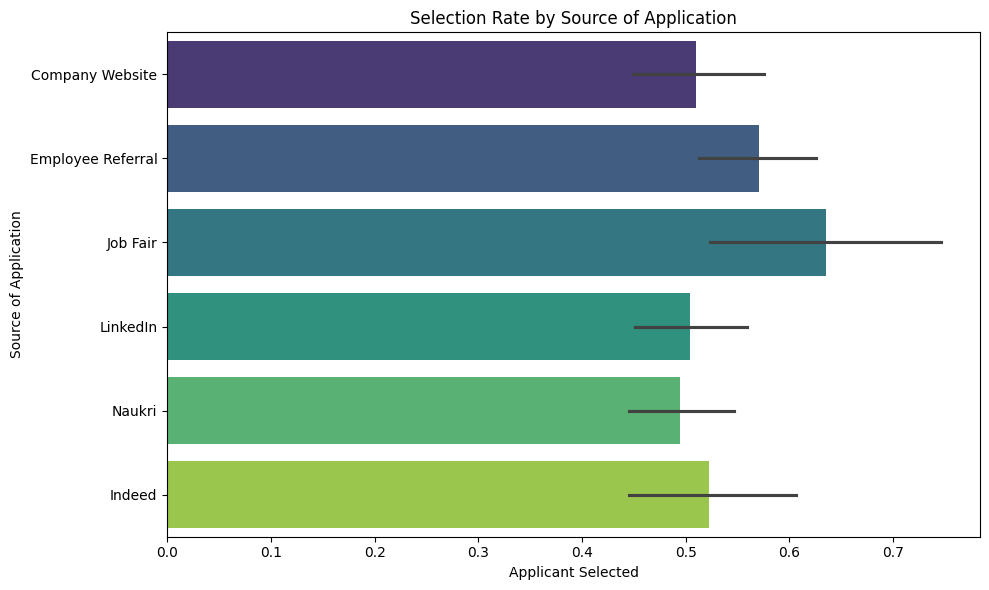

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Applicant Selected', y='Source of Application', data=df, palette="viridis")
plt.title('Selection Rate by Source of Application')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16740\2659274736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Source of Application', data=df_copy, order = df_copy['Source of Application'].value_counts().index, palette='viridis')


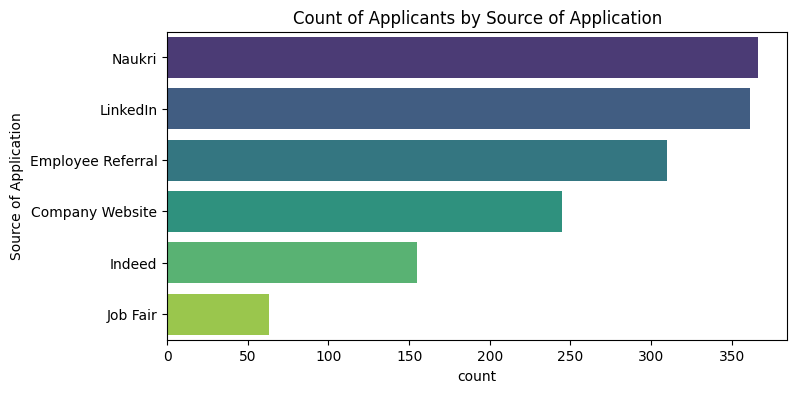

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(y='Source of Application', data=df_copy, order = df_copy['Source of Application'].value_counts().index, palette='viridis')
plt.title('Count of Applicants by Source of Application')
plt.show()

In [20]:
company_acceptance = df_copy.groupby("Companies")["Applicant Selected"].agg(
    applied="count",
    selected=lambda x: x.sum()
)
company_acceptance["selection_rate"] = company_acceptance["selected"] / company_acceptance["applied"]
print(company_acceptance)

               applied  selected  selection_rate
Companies                                       
Accenture           69        25        0.362319
Adobe               72        27        0.375000
Amazon              83        24        0.289157
Byju's              84        78        0.928571
Capgemini           66        30        0.454545
Cognizant           55        27        0.490909
Deloitte            68        36        0.529412
Flipkart            70        30        0.428571
Google              83        35        0.421687
HCL                 59        30        0.508475
HealthTechY         74        71        0.959459
Infosys             52        20        0.384615
Microsoft           77        19        0.246753
Ola                 64        30        0.468750
Paytm               67        29        0.432836
Reliance Jio        62        38        0.612903
StartUpX            72        66        0.916667
Swiggy              61        27        0.442623
TCS                 

In [21]:
company_salary = df_copy.groupby("Companies")["Salary"].mean()
print(company_salary.apply(lambda x: f"{x:,.0f}"))

Companies
Accenture        1,155,043
Adobe            1,531,986
Amazon           1,559,241
Byju's             897,964
Capgemini        1,184,606
Cognizant        1,177,255
Deloitte         1,318,853
Flipkart         1,232,600
Google           1,692,145
HCL              1,178,254
HealthTechY      1,148,324
Infosys          1,140,135
Microsoft        1,583,961
Ola              1,264,328
Paytm            1,230,075
Reliance Jio     1,177,435
StartUpX         1,034,764
Swiggy           1,199,689
TCS              1,128,577
Tech Mahindra    1,188,000
Wipro            1,183,464
Zomato           1,198,897
Name: Salary, dtype: object


In [22]:
degree_acceptance = df_copy.groupby("Educational Degree")["Applicant Selected"].agg(
    applied="count",
    selected=lambda x: x.sum()
)
degree_acceptance["selection_rate"] = degree_acceptance["selected"] / degree_acceptance["applied"]
print(degree_acceptance)

                      applied  selected  selection_rate
Educational Degree                                     
B.Com                      42        29        0.690476
B.Tech                    743       335        0.450875
BCA                        53        31        0.584906
Chartered Accountant       27        15        0.555556
M.Com                      12         9        0.750000
M.Tech                    261       143        0.547893
MBA                        94        59        0.627660
MCA                       224       138        0.616071
PhD                        44        27        0.613636


In [23]:
degree_salary = df_copy.groupby("Educational Degree")["Salary"].mean()
print(degree_salary.apply(lambda x: f"{x:,.0f}"))

Educational Degree
B.Com                     839,762
B.Tech                  1,194,770
BCA                     1,029,755
Chartered Accountant    1,468,704
M.Com                   1,207,667
M.Tech                  1,429,126
MBA                     1,139,713
MCA                     1,290,438
PhD                     1,827,477
Name: Salary, dtype: object


In [24]:
job_title_acceptance = df_copy.groupby("Job_Title")["Applicant Selected"].agg(
    applied="count",
    selected=lambda x: x.sum()
)
job_title_acceptance["selection_rate"] = job_title_acceptance["selected"] / job_title_acceptance["applied"]
print(job_title_acceptance)

                      applied  selected  selection_rate
Job_Title                                              
Backend Engineer          334       171        0.511976
Business Analyst           55        27        0.490909
Chartered Accountant       27        15        0.555556
Data Analyst               86        37        0.430233
Data Scientist             95        52        0.547368
Financial Analyst          37        16        0.432432
Frontend Developer         56        33        0.589286
ML Engineer                49        25        0.510204
Sales Executive            79        62        0.784810
Software Developer        632       320        0.506329
Web Developer              50        28        0.560000


In [25]:
job_title_salary = df_copy.groupby("Job_Title")["Salary"].mean()
print(job_title_salary.apply(lambda x: f"{x:,.0f}"))

Job_Title
Backend Engineer        1,268,153
Business Analyst        1,202,127
Chartered Accountant    1,468,704
Data Analyst            1,018,407
Data Scientist          1,588,368
Financial Analyst       1,220,351
Frontend Developer      1,197,482
ML Engineer             1,794,143
Sales Executive           901,722
Software Developer      1,248,142
Web Developer           1,066,200
Name: Salary, dtype: object


In [26]:
skills_acceptance = df_copy.groupby("Number of Skills")["Applicant Selected"].agg(
    applied="count",
    selected=lambda x: x.sum()
)
skills_acceptance["selection_rate"] = skills_acceptance["selected"] / skills_acceptance["applied"]
print(skills_acceptance)

                  applied  selected  selection_rate
Number of Skills                                   
2                     310        60        0.193548
3                     301        54        0.179402
4                     305       223        0.731148
5                     286       221        0.772727
6                     298       228        0.765101


In [27]:
skills_salary = df_copy.groupby("Number of Skills")["Salary"].mean()
print(skills_salary.apply(lambda x: f"{x:,.0f}"))

Number of Skills
2    1,248,281
3    1,232,286
4    1,226,531
5    1,261,930
6    1,303,426
Name: Salary, dtype: object


In [28]:
experience_acceptance = df_copy.groupby("Experience_Years")["Applicant Selected"].agg(
    applied="count",
    selected=lambda x: x.sum()
)
experience_acceptance["selection_rate"] = experience_acceptance["selected"] / experience_acceptance["applied"]
print(experience_acceptance)

                  applied  selected  selection_rate
Experience_Years                                   
0                      57        12        0.210526
1                      64         9        0.140625
2                     126        48        0.380952
3                     129        58        0.449612
4                     261       149        0.570881
5                     263       152        0.577947
6                     265       163        0.615094
7                     131        80        0.610687
8                     111        62        0.558559
9                      45        24        0.533333
10                     48        29        0.604167


In [29]:
experience_salary = df_copy.groupby("Experience_Years")["Salary"].mean()
print(experience_salary.apply(lambda x: f"{x:,.0f}"))

Experience_Years
0     1,045,404
1     1,142,266
2     1,148,690
3     1,156,822
4     1,215,291
5     1,250,863
6     1,287,589
7     1,350,351
8     1,418,955
9     1,419,733
10    1,437,188
Name: Salary, dtype: object


In [30]:
app_source_acceptance = df_copy.groupby("Source of Application")["Applicant Selected"].agg(
    applied="count",
    selected=lambda x: x.sum()
)
app_source_acceptance["selection_rate"] = app_source_acceptance["selected"] / app_source_acceptance["applied"]
print(app_source_acceptance)

                       applied  selected  selection_rate
Source of Application                                   
Company Website            245       125        0.510204
Employee Referral          310       177        0.570968
Indeed                     155        81        0.522581
Job Fair                    63        40        0.634921
LinkedIn                   361       182        0.504155
Naukri                     366       181        0.494536


In [31]:
app_source_salary = df_copy.groupby("Source of Application")["Salary"].mean()
print(app_source_salary.apply(lambda x: f"{x:,.0f}"))

Source of Application
Company Website      1,267,290
Employee Referral    1,247,413
Indeed               1,261,045
Job Fair             1,248,159
LinkedIn             1,247,784
Naukri               1,255,683
Name: Salary, dtype: object


### 5. MODEL TRAINING

In [32]:
df_copy.columns

Index(['Companies', 'Job_Title', 'Educational Degree', 'Experience_Years',
       'Number of Skills', 'Source of Application', 'Salary',
       'Applicant Selected'],
      dtype='object')

Logistic Regression Accuracy: 0.83
Random Forest Accuracy: 0.9033333333333333

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       143
           1       0.91      0.90      0.91       157

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



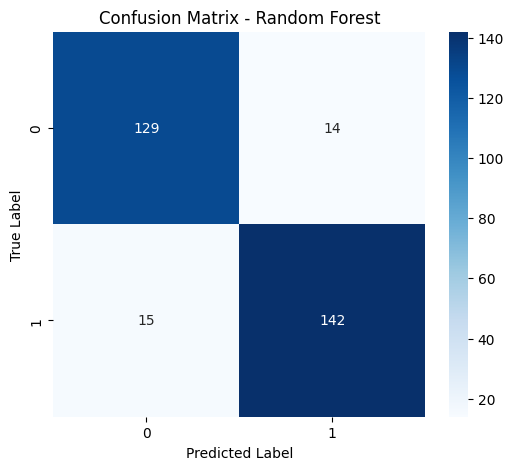

In [33]:
x = df_copy.drop(columns=["Applicant Selected", "Source of Application"])  #"Salary",
y = df_copy["Applicant Selected"]

# Spliting the data in 4:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing steps
cat_ft = ["Companies", "Job_Title", "Educational Degree"] #"Location", "Source of Application"
num_ft = ["Experience_Years", "Number of Skills"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_ft),
    ("num", StandardScaler(), num_ft)
])

# Model 1: Logistic Regression
log_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])
log_reg_pipeline.fit(x_train, y_train)
y_pred_log = log_reg_pipeline.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Model 2: Random Forest Classifier
rf_clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])
rf_clf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_clf_pipeline.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Display detailed report for the better model (Random Forest)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [34]:
import joblib
# create models directory if it doesn't exist
import os
os.makedirs("models", exist_ok=True)

# Save the trained pipeline
joblib.dump(rf_clf_pipeline, "models/model.pkl")
print("Saved models/model.pkl")

Saved models/model.pkl


In [35]:
x_test.head()

,Companies,Job_Title,Educational Degree,Experience_Years,Number of Skills,Salary
812,Infosys,Software Developer,MCA,7,2,1319000
378,Paytm,Backend Engineer,B.Tech,6,5,1241000
495,Byju's,Software Developer,B.Tech,7,3,1056000
1083,StartUpX,Frontend Developer,BCA,5,6,1009000
283,Infosys,Software Developer,B.Tech,5,3,1173000


In [36]:
df_copy.columns

Index(['Companies', 'Job_Title', 'Educational Degree', 'Experience_Years',
       'Number of Skills', 'Source of Application', 'Salary',
       'Applicant Selected'],
      dtype='object')

### 6. Machine Learning - Salary Prediction (Regression)

In [37]:
# We drop 'Skills' as before, but keep 'Shortlisted' as a feature for predicting salary
X = df_copy.drop(columns=["Salary", "Source of Application", "Applicant Selected"])
Y = df_copy["Salary"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define preprocessing steps (numerical features now include 'Shortlisted')
categorical_features = ["Companies", "Job_Title", "Educational Degree"]
numerical_features = ["Experience_Years", "Number of Skills"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", StandardScaler(), numerical_features)
])

# --- Model 1: Linear Regression ---
lin_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
lin_reg_pipeline.fit(X_train, Y_train)
y_pred_lin = lin_reg_pipeline.predict(X_test)
print(f"Linear Regression R2 Score: {r2_score(Y_test, y_pred_lin):.4f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred_lin)):.2f}")

# --- Model 2: Random Forest Regressor ---
rf_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])
rf_reg_pipeline.fit(X_train, Y_train)
y_pred_rf = rf_reg_pipeline.predict(X_test)
print(f"\nRandom Forest Regressor R2 Score: {r2_score(Y_test, y_pred_rf):.4f}")
print(f"Random Forest Regressor RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred_rf)):.2f}")

Linear Regression R2 Score: 0.9802
Linear Regression RMSE: 30741.10

Random Forest Regressor R2 Score: 0.9577
Random Forest Regressor RMSE: 44917.38


In [38]:
from IPython.display import display, clear_output
import ipywidgets as widgets

# Widgets
com_input = widgets.Dropdown(options=['--'] + df_copy['Companies'].unique().tolist(), description='Company')

job_input = widgets.Dropdown(options=['--'], description='Job')

deg_input = widgets.Dropdown(options=['--'], description='Degree')

exp_val = widgets.BoundedFloatText(value=1.0, min=0, max=30, step=0.5, description='Years')

skills_val = widgets.BoundedIntText(value=3, min=0, max=10, step=1, description='Skills')

btn = widgets.Button(description='Predict', button_style='success')

out = widgets.Output()

In [39]:
# Updation of jobs based on companies
def company_func(v):
    jobs = df_copy[df_copy['Companies'] == com_input.value]['Job_Title'].unique().tolist()
    job_input.options = ['--'] + jobs
    deg_input.options = ['--']

# Updation of degree based on jobs
def job_func(v):
    degs = df_copy[
        (df_copy['Companies'] == com_input.value) &
        (df_copy['Job_Title'] == job_input.value)
    ]['Educational Degree'].unique().tolist()
    deg_input.options = ['--'] + degs

In [40]:
# Prediction working
def button(v):
    with out:
        clear_output()
        if com_input.value == '--' or job_input.value == '--' or deg_input.value == '--':
            print("⚠️ Please choose all fields.")
            return
        X = pd.DataFrame({
            'Companies': [com_input.value],
            'Job_Title': [job_input.value],
            'Educational Degree': [deg_input.value],
            'Experience_Years': [float(exp_val.value)],
            'Number of Skills': [int(skills_val.value)]
        })
        selec_pred = rf_clf_pipeline.predict(X)[0]
        sal_pred = lin_reg_pipeline.predict(X)[0]
        print("✅ Likely to be Selected" if selec_pred == 1 else "❌ Unlikely to be Selected")
        print(f"💰 Predicted Salary: ₹{sal_pred:,.2f}")

In [41]:
# Observation
com_input.observe(company_func)
job_input.observe(job_func)
btn.on_click(button)

In [42]:
# Display UI
display(widgets.VBox([com_input, job_input, deg_input, exp_val, skills_val, btn, out]))

In [43]:
# df_copy.to_csv("dataset_tableau.csv", index=False)
# print("Exported dataset_tableau.csv for Tableau dashboards")

In [40]:
import joblib
import os
os.makedirs('models', exist_ok=True)
joblib.dump(rf_clf_pipeline, 'models/model.pkl')
print("✅ Model saved to models/model.pkl")

✅ Model saved to models/model.pkl
